In [7]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

boston_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
boston_df=pd.read_csv(boston_url)
boston_df.describe()


,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,252.500000,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,146.213884,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.000000,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,126.250000,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,252.500000,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,378.750000,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,505.000000,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


Text(0.5, 1.0, 'owner-occupied homes')

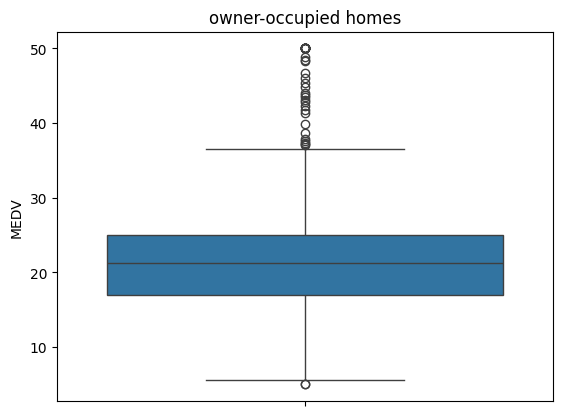

In [10]:
x = sns.boxplot(y='MEDV',data=boston_df)
x.set_title(label="owner-occupied homes")

Text(0.5, 1.0, 'Nb de maison près Charles River')

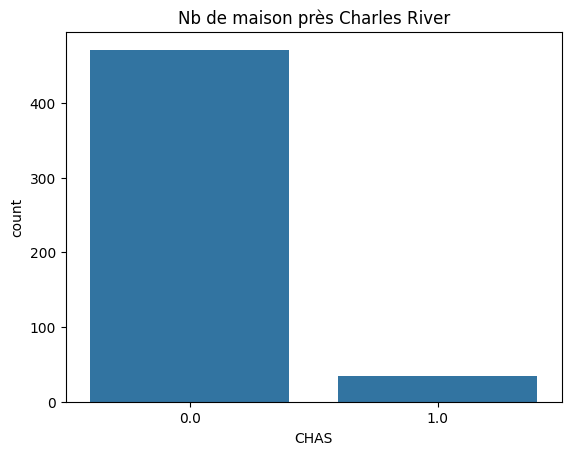

In [12]:
x1 = sns.countplot(x = 'CHAS', data = boston_df)
x1.set_title('Nb de maison près Charles River')

Text(0.5, 1.0, "Valeur médiane des maisons occupées par leur propriétaire par Groupe d' age")

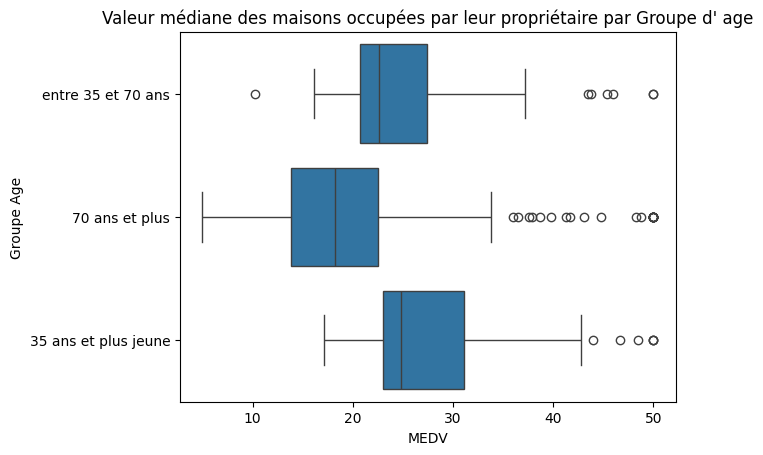

In [27]:
boston_df.loc[(boston_df['AGE'] <= 35), 'Groupe Age'] = '35 ans et plus jeune'
boston_df.loc[(boston_df['AGE'] > 35) & (boston_df['AGE'] < 70), 'Groupe Age'] = 'entre 35 et 70 ans'
boston_df.loc[(boston_df['AGE'] >= 70), 'Groupe Age'] = '70 ans et plus'

x2 = sns.boxplot(x = 'MEDV', y = 'Groupe Age', data = boston_df)
x2.set_title("Valeur médiane des maisons occupées par leur propriétaire par Groupe d' age")

Text(0.5, 1.0, 'Indus versus NOX')

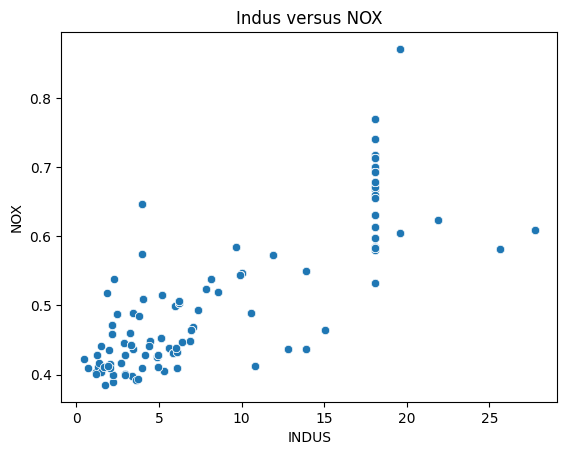

In [28]:
x3 = sns.scatterplot(y='NOX', x= 'INDUS',data=boston_df)
x3.set_title(label='Indus versus NOX')

Text(0.5, 1.0, "taux d'encadrement par ville")

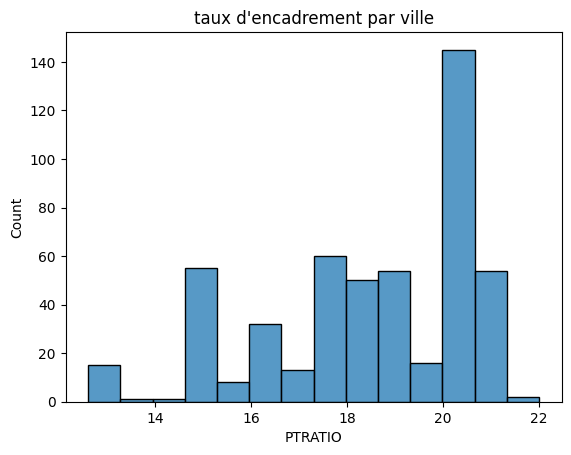

In [29]:
x4 = sns.histplot(x='PTRATIO', data=boston_df)
x4.set_title(label="taux d'encadrement par ville")

Text(0.5, 1.0, 'Median value of owner-occupied homes per Age Group')

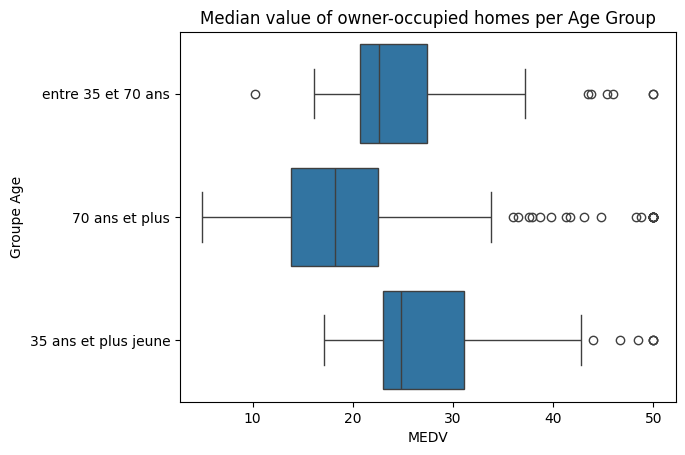

*******************************************************
tache 5 question 1
#Existe-t-il une différence statistique dans la valeur médiane des maisons bordées par la rivière Charles ou non ? (Test T pour les échantillons indépendants)

# hypothèse nulle : il n'y a pas de difference statistique dans la valeur médiane des maisons bordées par la rivière Charles ou non ? 
# hypothèse alternative : il y a une difference statistique dans la valeur médiane des maisons bordées par la rivière Charles ou non ?

In [36]:
import scipy.stats
boston_df.loc[(boston_df['CHAS'] == 0), 'CHA_R_Test'] = 'LOIN'
boston_df.loc[(boston_df['CHAS'] == 1), 'CHA_R_Test'] = 'PRES'

scipy.stats.ttest_ind(boston_df[boston_df['CHA_R_Test'] == 'LOIN']['MEDV'],boston_df[boston_df['CHA_R_Test'] == 'PRES']['MEDV'], equal_var = True)

Ttest_indResult(statistic=-3.996437466090509, pvalue=7.390623170519905e-05)

p value < 0.05 , nous pouvons rejeter l'hypothèse nulle.

*******************************************************
tache 5 question 2
hypothèse nulle : il n'y a pas de  une différence dans les valeurs médianes des maisons (MEDV) pour chaque proportion d'unités occupées par le propriétaire et construites avant 1940 (AGE) ? (ANOVA)

hypothèse alternative: il y a  de  une différence dans les valeurs médianes des maisons (MEDV) pour chaque proportion d'unités occupées par le propriétaire et construites avant 1940 (AGE) ? (ANOVA)

In [38]:
from statsmodels.formula.api import ols
import statsmodels.api as sm
lm = ols('MEDV ~ AGE', data = boston_df).fit()
table = sm.stats.anova_lm(lm)
print(table)

             df        sum_sq      mean_sq          F        PR(>F)
AGE         1.0   6069.761065  6069.761065  83.477459  1.569982e-18
Residual  504.0  36646.534350    72.711378        NaN           NaN


p value est inferieur à 0.05 donc on rejette l'hypothèse nulle 

************************************************************************************************
Tache 5 Q3 
Peut-on conclure qu'il n'y a pas de relation entre les concentrations d'oxyde nitrique et la proportion d'hectares de commerces autres que de détail par ville (corrélation de Pearson) ?
H0 : pas de relation entre les concentrations d'oxyde nitrique et la proportion d'hectares
H1 : relation entre les concentrations d'oxyde nitrique et la proportion

In [39]:
scipy.stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])

PearsonRResult(statistic=0.7636514469209158, pvalue=7.91336106123623e-98)

Coef = 0.76 et pvalue < 0.05 alors on rejete h0 et accepte h1


************************************************************************************************
Tache 5 Q4
Quel est l'impact d'une distance pondérée supplémentaire par rapport aux cinq centres d'emploi de Boston sur la valeur médiane des maisons occupées par leur propriétaire ? (Analyse de régression)



In [43]:
x = boston_df['DIS']
y = boston_df['MEDV']

x = sm.add_constant(x)

modele = sm.OLS(y, x).fit()
prediction = modele.predict(x)

modele.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Fri, 12 Jan 2024   Prob (F-statistic):           1.21e-08
Time:                        22:34:12   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

le coef 1.0916 montre que la distance pondérée par rapport à 5 centre d'emploi de boston augmente de 1.0916 la valeur médiane des maisons occupées